In [172]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from networkx.algorithms import community
# pos = nx.spring_layout(G)
# fig = plt.figure(figsize=(4, 2))
# nx.draw(G, with_labels=True)

In [173]:
#original graph
G = nx.Graph()
G.add_nodes_from(['A','B','C','D','E','F','G','H', 'I', 'J','K'])
G.add_edges_from([('A','B'),('A','C'),('B','C'),('C','D'),
                  ('D','E'),('D','I'),('E','G'),('E','F'),
                  ('F','G'),('G','H'),('H','I'),('H','J'),
                  ('I','J'),('K','I'),('J','K')])

# removing edge D-C
G.remove_edge('D','C')

print("Edge betweenness of (G,H) excluding only edge (D,C): ",
      nx.edge_betweenness_centrality(G,normalized=False)[('G','H')])

print()

# removing edge G-H
G.remove_edge('G','H')

print("Edge betweenness of (D,E) excluding edges (D,C) and (G,H): ",
      nx.edge_betweenness_centrality(G, normalized=False)[('D','E')])
print("Edge betweenness of (D,I) excluding edges (D,C) and (G,H): ",
      nx.edge_betweenness_centrality(G, normalized=False)[('D','I')])


Edge betweenness of (G,H) excluding only edge (D,C):  8.666666666666666

Edge betweenness of (D,E) excluding edges (D,C) and (G,H):  15.0
Edge betweenness of (D,I) excluding edges (D,C) and (G,H):  16.0


In [174]:
#original graph
G = nx.Graph()
G.add_nodes_from(['A','B','C','D','E','F','G','H', 'I', 'J','K'])
G.add_edges_from([('A','B'),('A','C'),('B','C'),('C','D'),
                  ('D','E'),('D','I'),('E','G'),('E','F'),
                  ('F','G'),('G','H'),('H','I'),('H','J'),
                  ('I','J'),('K','I'),('J','K')])

# removing edge D-C
G.remove_edge('D','C')

# copy of graph G, without nodes 'A' 'B' and 'C'
L = G.copy()
L.remove_nodes_from(['A','B','C'])

print(nx.edge_betweenness_centrality(G,normalized=False)[('G','H')])
print(nx.edge_betweenness_centrality(L,normalized=False)[('G','H')])

8.666666666666666
8.666666666666666


In [175]:
import networkx as nx
import numpy as np

def create_sbm(n, k, p, q):
    F = nx.Graph()

    nodes = list(range(n))
    blocks = np.random.choice(range(k), n)

    for node, block in zip(nodes, blocks):
        F.add_node(node, block=block)

    for i in range(n):
        for j in range(i+1, n):
            if blocks[i] == blocks[j]:
                if np.random.rand() < p:
                    F.add_edge(i, j)
            else:
                if np.random.rand() < q:
                    F.add_edge(i, j)

    return F

# pos = nx.spring_layout(L)
# fig = plt.figure(figsize=(4, 2))
# nx.draw(L, with_labels=True)

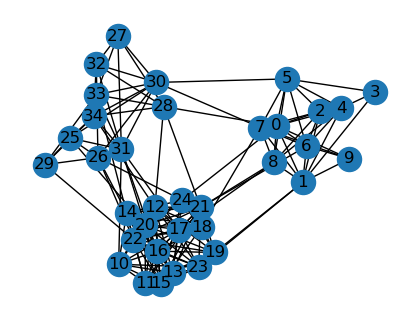

In [186]:
# Sizes of the blocks
sizes = [10, 15, 10]

# Probability matrix
p_matrix = [[0.7, 0.03, 0.02],
            [0.03, 0.8, 0.07],
            [0.02, 0.07, 0.7]]

# Generate the stochastic block model graph
S = nx.stochastic_block_model(sizes, p_matrix)
pos = nx.spring_layout(S)
fig = plt.figure(figsize=(4, 3))
nx.draw(S,pos=pos, with_labels=True)

In [187]:
girvan = community.girvan_newman(S)

modularity = 0
for c in girvan:
    if (community.modularity(S, c) > modularity):
        modularity = community.modularity(S, c)
        communities = c

print("Modularity: ", modularity)
print("Communities: \n", communities[0],
                  ",\n", communities[1],
                  ",\n", communities[2])    

Modularity:  0.45301870748299317
Communities: 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} ,
 {10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24} ,
 {32, 33, 34, 25, 26, 27, 28, 29, 30, 31}
